Importar as bibliotecas necessárias

In [1]:
from qiskit import QuantumCircuit, visualization
import matplotlib.pyplot as plt

Preparar estado inicial

In [2]:
#Construi circuitos para 00, 01, 10 e 11 (sem c_if() é claro)
def q_input(a: int, b: int) -> QuantumCircuit:
    qc_initial_states = QuantumCircuit(2)
    if a == b == 1:
        qc_initial_states.x([0,1])
    if a == 0 and b == 1:
        qc_initial_states.x(1)
    if a == 1 and b == 0:
        qc_initial_states.x(0)
    return qc_initial_states

Criar circuito

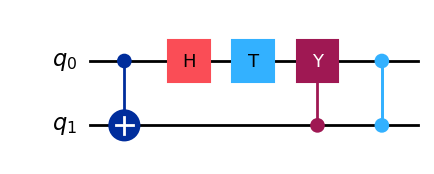

In [3]:
#importar biblioteca dos "gates"
import qiskit.circuit.library as gates_lib
#Construir circuito (sem "classical register")
qc = QuantumCircuit(2)
#aplicar cnot (control é o primeiro qubit)
qc.cx(0,1)
#aplicar gate h no primeiro qubit
qc.h(0)
#aplicar gate t no primeiro qubit
T = gates_lib.TGate()
qc.append(T, [0])
#aplicar control Y (control é o 2º qubit)
CY = gates_lib.CYGate()
qc.append(CY, [1,0])
#aplicar control Z (control é o 2º qubit)
CZ = gates_lib.CZGate()
qc.append(CZ, [1,0])
#conferir o circuit
qc.draw(output="mpl")

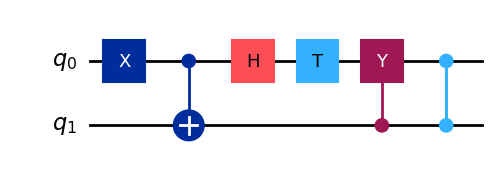

In [5]:
#Medir na base x
medir_base_x = QuantumCircuit(1,1)
medir_base_x.h(0)
medir_base_x.measure(0,0)
#Medir na base y
medir_base_y = QuantumCircuit(1,1)
medir_base_y.sdg(0)
medir_base_y.h(0)
medir_base_y.measure(0,0)



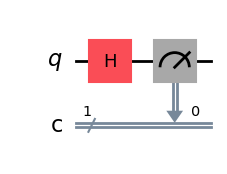

In [37]:
medir_base_x.draw(output="mpl")

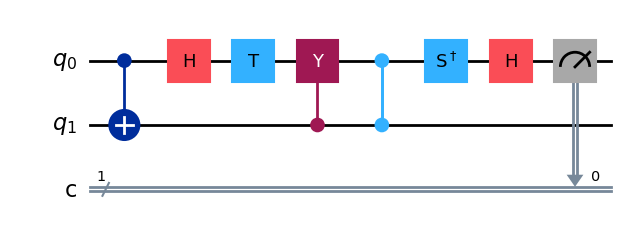

In [6]:
j = 1 #índice da string
new_qc_y = qc.compose(medir_base_y)
new_qc_y.draw(output="mpl")

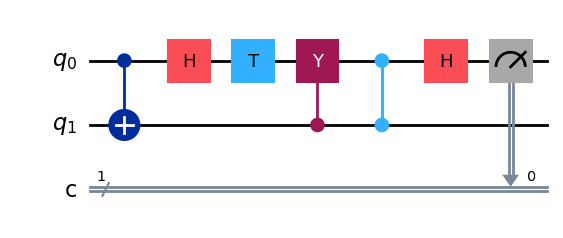

In [7]:
j = 0
new_qc_x = qc.compose(medir_base_x)
new_qc_x.draw(output="mpl")

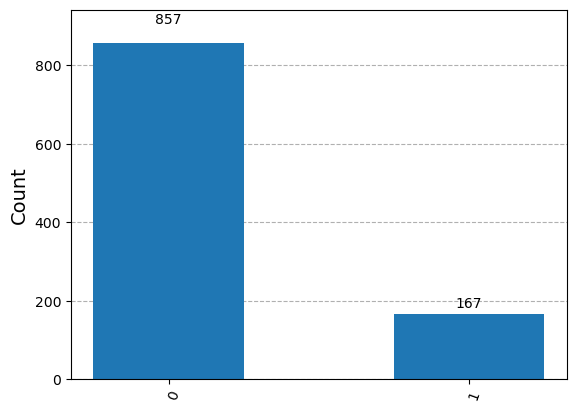

In [8]:
from qiskit.providers.basic_provider import BasicSimulator

simulator_basic = BasicSimulator()
job = simulator_basic.run(new_qc_y, shots=1024) #palavra é 00
result = job.result()
counts = result.get_counts()
visualization.plot_histogram(counts)



In [22]:
from qiskit.providers.basic_provider import BasicSimulator

def run_show_circuit(initial_state: QuantumCircuit, measuring_base: QuantumCircuit):
    simulator_basic = BasicSimulator()
    circuit = initial_state.compose(qc)
    job = simulator_basic.run(circuit.compose(measuring_base), shots=1024) #palavra é 00
    result = job.result()
    counts = result.get_counts()
    return counts
    



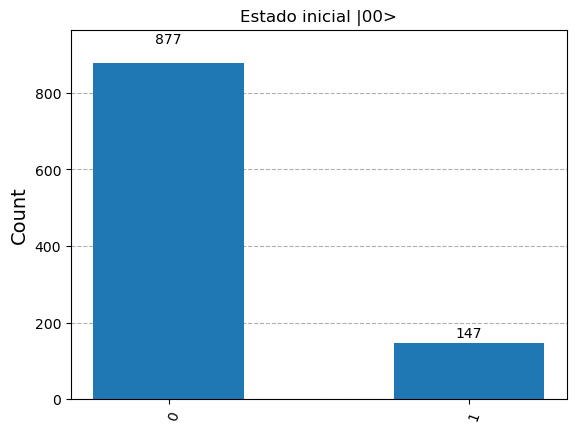

In [43]:
counts = run_show_circuit(q_input(0,0), medir_base_x)
visualization.plot_histogram(counts, title="Estado inicial |00>")


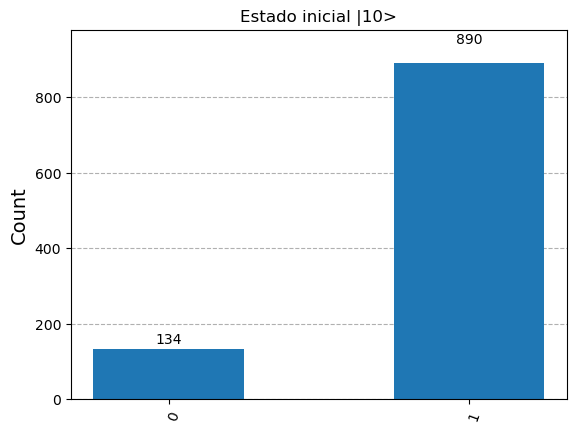

In [44]:
counts = run_show_circuit(q_input(1,0), medir_base_x)
visualization.plot_histogram(counts, title="Estado inicial |10>")

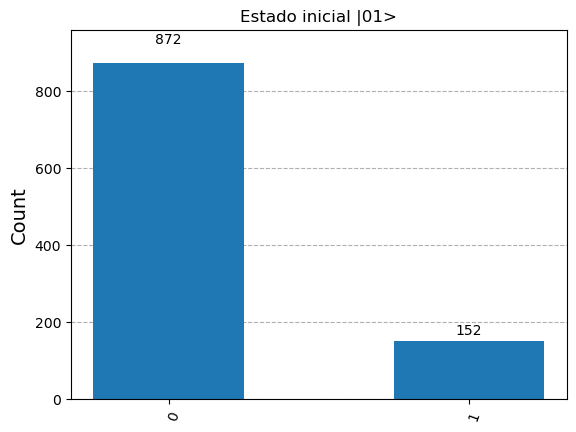

In [45]:
counts = run_show_circuit(q_input(0,1), medir_base_x)
visualization.plot_histogram(counts, title="Estado inicial |01>")

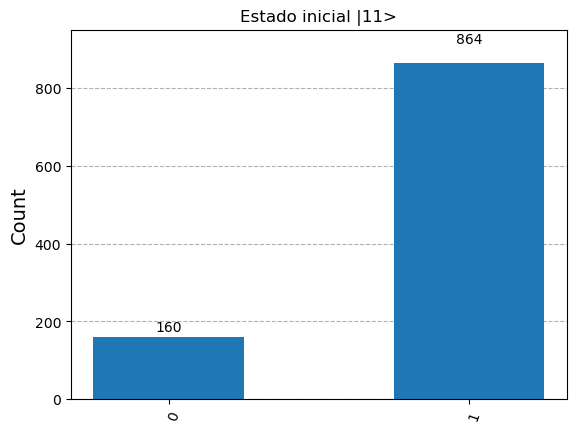

In [46]:
counts = run_show_circuit(q_input(1,1), medir_base_x)
visualization.plot_histogram(counts, title="Estado inicial |11>")